In [1]:
import itertools
import networkx as nx
from datetime import datetime

import numpy as np
import random
from scipy.stats import truncnorm
import math

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import pandas as pd

# Households: creating dummy data from real statistics

https://data.census.gov/cedsci/table?q=Families%20and%20Living%20Arrangements&tid=ACSDP1Y2018.DP02&vintage=2018&layer=VT_2018_040_00_PY_D1

In USA, 2.63 persons / household

Households are either:
* Families: 65% of households are families, with 3,24 members in average. (27% of families are monoparental)
* Nonfamilies: 
    * 28% are people leaving alone
    * 7% are roommates, foster homes, etc.

Among the total population in households, 30% are children (under 18). Let's say children are exclusively in families (no foster care centers, juste foster families).

The objective of this notebook is to build a fictive dataset, with the population P as input. The output is a cvs file with for each household as a row: 
* `nb_children`
* `nb_adults`
* `type` (`two_parent_family`, `single_parent_family`, `leaving_alone`, `roomates_household`)
* `size`


In [2]:
# Global variables
# Population Size
P = 10000

In [3]:
nb_households = P/2.63
nb_households

3802.2813688212927

## Families

In [4]:
nb_families = round(65*nb_households/100)
nb_families

2471

Text(0.5, 1.0, "2471 Families' composition (mean family size=1.3111758996297764)")

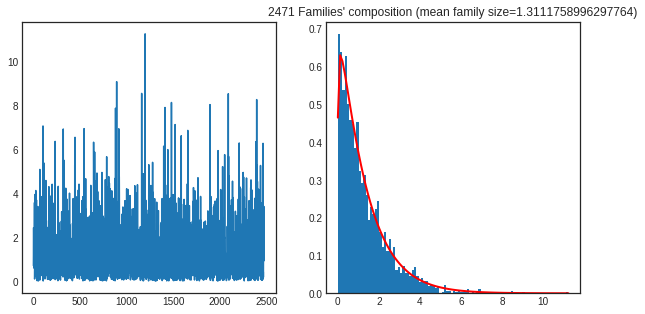

In [5]:
# Generate our families
# The Gamma distribution 
# https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.gamma.html?highlight=gamma#numpy.random.gamma
shape = 1.1
scale = 1.2
family_size = np.random.gamma(shape, scale, nb_families) #1D Array filled with random values as per gaussian distribution 

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2, 1)
ax1.plot(family_size) 

ax2 = fig.add_subplot(1,2, 2)
count, bins, _ = plt.hist(family_size, 100, density=True)
import scipy.special as sps
y = bins**(shape-1)*(np.exp(-bins/scale) / (sps.gamma(shape)*scale**shape))
ax2.plot(bins, y, linewidth=2, color='r')
plt.title("{} Families' composition (mean family size={})".format(str(nb_families),str(np.mean(family_size))))

In [6]:
# On considère les familles d'au moins un adulte et un enfant, i.e taille 2
family_size = np.round(family_size)+2
np.mean(family_size)

3.280857952246054

In [7]:
family_size

array([4., 3., 3., ..., 5., 3., 4.])

In [8]:
from collections import Counter

family_size_counts = Counter(family_size)
family_size_counts

Counter({2.0: 758,
         3.0: 900,
         4.0: 457,
         5.0: 194,
         6.0: 102,
         7.0: 31,
         8.0: 12,
         9.0: 8,
         10.0: 5,
         11.0: 3,
         13.0: 1})

In [9]:
# 30% of P are children 
nb_children = round(30*P/100)
nb_children
# Let's say children are exclusively in families (no foster home)

3000

In [10]:
single_parent = {}
single_parent_size = [i for i in family_size if i==2]
remaining_children = nb_children
for f in range(len(single_parent_size)):
    single_parent[f] = {}
    single_parent[f]['type']='single_parent_family'
    single_parent[f]['size']=single_parent_size[f]
    single_parent[f]['nb_adults']=1
    single_parent[f]['nb_children']=1
    remaining_children-=1

remaining_children    

2242

In [11]:

# should be around 27% of total households, but obviously is not!
print("Nb of single parent households: %d (%d%% of total households)" % (len(single_parent),len(single_parent)*100/nb_households))

Nb of single parent households: 758 (19% of total households)


In [12]:
# we have to choose a family for the children remaining children
# The more large the family, the more children
c= 0
two_parent = {}
two_parent_size = [i for i in family_size if i>2]
for f in range(len(two_parent_size)):
    # loi normale décalée telle que la moyenne égale 3 fois le nombre d'enfants
    children = random.choice(range(3*(int(two_parent_size[f])-2)))
    if children > int(two_parent_size[f])-2:
        children = int(two_parent_size[f])-2
    two_parent[f]={}
    two_parent[f]['nb_children']=children
    two_parent[f]['nb_adults']=int(two_parent_size[f])-children
    two_parent[f]['type']='two_parent_family'
    two_parent[f]['size']=two_parent_size[f]
    c+=children
    
if (remaining_children-c) <0:
    print("Too many children!!! %d instead of %d." %(nb_children+(c-remaining_children),nb_children))

Too many children!!! 3085 instead of 3000.


In [13]:
two_parent

{0: {'nb_adults': 2,
  'nb_children': 2,
  'size': 4.0,
  'type': 'two_parent_family'},
 1: {'nb_adults': 2,
  'nb_children': 1,
  'size': 3.0,
  'type': 'two_parent_family'},
 2: {'nb_adults': 3,
  'nb_children': 0,
  'size': 3.0,
  'type': 'two_parent_family'},
 3: {'nb_adults': 2,
  'nb_children': 2,
  'size': 4.0,
  'type': 'two_parent_family'},
 4: {'nb_adults': 2,
  'nb_children': 2,
  'size': 4.0,
  'type': 'two_parent_family'},
 5: {'nb_adults': 3,
  'nb_children': 0,
  'size': 3.0,
  'type': 'two_parent_family'},
 6: {'nb_adults': 3,
  'nb_children': 0,
  'size': 3.0,
  'type': 'two_parent_family'},
 7: {'nb_adults': 2,
  'nb_children': 1,
  'size': 3.0,
  'type': 'two_parent_family'},
 8: {'nb_adults': 2,
  'nb_children': 1,
  'size': 3.0,
  'type': 'two_parent_family'},
 9: {'nb_adults': 2,
  'nb_children': 2,
  'size': 4.0,
  'type': 'two_parent_family'},
 10: {'nb_adults': 2,
  'nb_children': 4,
  'size': 6.0,
  'type': 'two_parent_family'},
 11: {'nb_adults': 2,
  'nb_chi

In [14]:
len(two_parent)

1713

## Nonfamily households

In [15]:
nb_leaving_alone = round(28*nb_households/100)
nb_leaving_alone

1065

In [16]:
leaving_alone={}
for f in range(nb_leaving_alone):
    leaving_alone[f]={}
    leaving_alone[f]['nb_children']=0
    leaving_alone[f]['nb_adults']=1
    leaving_alone[f]['type']='leaving_alone'
    leaving_alone[f]['size']=1
leaving_alone

{0: {'nb_adults': 1, 'nb_children': 0, 'size': 1, 'type': 'leaving_alone'},
 1: {'nb_adults': 1, 'nb_children': 0, 'size': 1, 'type': 'leaving_alone'},
 2: {'nb_adults': 1, 'nb_children': 0, 'size': 1, 'type': 'leaving_alone'},
 3: {'nb_adults': 1, 'nb_children': 0, 'size': 1, 'type': 'leaving_alone'},
 4: {'nb_adults': 1, 'nb_children': 0, 'size': 1, 'type': 'leaving_alone'},
 5: {'nb_adults': 1, 'nb_children': 0, 'size': 1, 'type': 'leaving_alone'},
 6: {'nb_adults': 1, 'nb_children': 0, 'size': 1, 'type': 'leaving_alone'},
 7: {'nb_adults': 1, 'nb_children': 0, 'size': 1, 'type': 'leaving_alone'},
 8: {'nb_adults': 1, 'nb_children': 0, 'size': 1, 'type': 'leaving_alone'},
 9: {'nb_adults': 1, 'nb_children': 0, 'size': 1, 'type': 'leaving_alone'},
 10: {'nb_adults': 1, 'nb_children': 0, 'size': 1, 'type': 'leaving_alone'},
 11: {'nb_adults': 1, 'nb_children': 0, 'size': 1, 'type': 'leaving_alone'},
 12: {'nb_adults': 1, 'nb_children': 0, 'size': 1, 'type': 'leaving_alone'},
 13: {'nb

In [17]:
nb_roomates_household = round(7*nb_households/100)
nb_roomates_household

266

Text(0.5, 1.0, "266 Roomates' household composition (mean size=3.2798695977013725)")

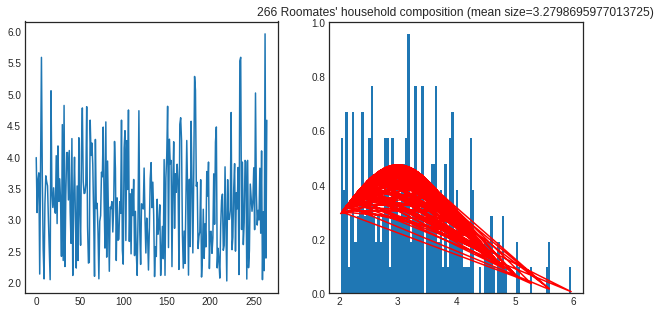

In [18]:
# truncnorm
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncnorm.html
# The standard form of this distribution is a standard normal truncated to the range [a, b] 

# We would like households in [2,6]

#loc = 10 # mean
#scale = 0.1 #std
#lowest, highest = 2,30
## — notice that a and b are defined over the domain of the standard normal. 
## To convert clip values for a specific mean and standard deviation, use:
#a, b = (lowest - loc)/scale, (highest + 1 - loc)/scale

loc = 3
scale = 1
a, b = (2 - loc)/scale, (6 + 1 - loc)/scale


nb_roomates_household_size = truncnorm.rvs(a, b, loc, scale, size=nb_roomates_household)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2, 1)
ax1.plot(nb_roomates_household_size) 

ax2 = fig.add_subplot(1,2, 2)
count, bins, ignored = ax2.hist(nb_roomates_household_size, 100, density=True)
ax2.plot(nb_roomates_household_size, truncnorm.pdf(nb_roomates_household_size, a, b, loc = loc, scale = scale),'r-')
plt.title("{} Roomates' household composition (mean size={})".format(str(nb_roomates_household),str(np.mean(nb_roomates_household_size))))

In [19]:
nb_roomates_household_size = np.round(nb_roomates_household_size)
nb_roomates_household_size

array([4., 3., 4., 4., 2., 4., 6., 4., 3., 2., 3., 4., 4., 4., 3., 3., 2.,
       5., 3., 3., 4., 3., 3., 4., 3., 4., 3., 4., 3., 2., 5., 2., 5., 2.,
       3., 4., 4., 3., 4., 3., 3., 4., 2., 3., 4., 3., 2., 4., 2., 4., 3.,
       3., 4., 5., 4., 3., 3., 4., 5., 3., 2., 2., 5., 4., 4., 4., 3., 2.,
       4., 3., 3., 3., 2., 3., 3., 4., 4., 4., 3., 3., 5., 2., 4., 3., 2.,
       3., 3., 3., 3., 3., 4., 4., 2., 3., 3., 3., 3., 3., 5., 3., 2., 4.,
       4., 3., 4., 3., 5., 3., 3., 2., 3., 3., 4., 2., 3., 2., 2., 3., 5.,
       3., 2., 3., 3., 3., 4., 3., 2., 3., 3., 2., 3., 4., 4., 3., 4., 3.,
       2., 3., 2., 3., 3., 3., 3., 2., 2., 3., 2., 4., 2., 4., 4., 5., 3.,
       4., 4., 4., 2., 4., 4., 3., 4., 3., 4., 4., 2., 5., 5., 4., 3., 2.,
       3., 2., 3., 4., 3., 2., 4., 3., 5., 4., 2., 4., 5., 5., 4., 4., 3.,
       3., 3., 4., 2., 2., 3., 2., 3., 3., 4., 3., 4., 2., 3., 3., 2., 3.,
       4., 3., 4., 4., 2., 3., 2., 2., 3., 3., 3., 3., 3., 4., 3., 2., 4.,
       3., 3., 3., 5., 3.

In [20]:
roomates_household = {}
for f in range(len(nb_roomates_household_size)):
    roomates_household[f] = {}
    roomates_household[f]['type']='roomates_household'
    roomates_household[f]['size']=nb_roomates_household_size[f]
    roomates_household[f]['nb_adults']=nb_roomates_household_size[f]
    roomates_household[f]['nb_children']=0
roomates_household

{0: {'nb_adults': 4.0,
  'nb_children': 0,
  'size': 4.0,
  'type': 'roomates_household'},
 1: {'nb_adults': 3.0,
  'nb_children': 0,
  'size': 3.0,
  'type': 'roomates_household'},
 2: {'nb_adults': 4.0,
  'nb_children': 0,
  'size': 4.0,
  'type': 'roomates_household'},
 3: {'nb_adults': 4.0,
  'nb_children': 0,
  'size': 4.0,
  'type': 'roomates_household'},
 4: {'nb_adults': 2.0,
  'nb_children': 0,
  'size': 2.0,
  'type': 'roomates_household'},
 5: {'nb_adults': 4.0,
  'nb_children': 0,
  'size': 4.0,
  'type': 'roomates_household'},
 6: {'nb_adults': 6.0,
  'nb_children': 0,
  'size': 6.0,
  'type': 'roomates_household'},
 7: {'nb_adults': 4.0,
  'nb_children': 0,
  'size': 4.0,
  'type': 'roomates_household'},
 8: {'nb_adults': 3.0,
  'nb_children': 0,
  'size': 3.0,
  'type': 'roomates_household'},
 9: {'nb_adults': 2.0,
  'nb_children': 0,
  'size': 2.0,
  'type': 'roomates_household'},
 10: {'nb_adults': 3.0,
  'nb_children': 0,
  'size': 3.0,
  'type': 'roomates_household'}

# Saving the Household in csv files

In [21]:
df = pd.DataFrame(two_parent).transpose()

In [22]:
df.shape

(1713, 4)

In [23]:
df= df.append(pd.DataFrame(single_parent).transpose(),ignore_index=True,sort=False)
df.shape

(2471, 4)

In [24]:
df= df.append(pd.DataFrame(roomates_household).transpose(),ignore_index=True,sort=False)
df.shape

(2737, 4)

In [25]:
df= df.append(pd.DataFrame(leaving_alone).transpose(),ignore_index=True,sort=False)
df.shape

(3802, 4)

In [26]:
df

,nb_children,nb_adults,type,size
0,2,2,two_parent_family,4
1,1,2,two_parent_family,3
2,0,3,two_parent_family,3
3,2,2,two_parent_family,4
4,2,2,two_parent_family,4
5,0,3,two_parent_family,3
6,0,3,two_parent_family,3
7,1,2,two_parent_family,3
8,1,2,two_parent_family,3
9,2,2,two_parent_family,4


In [27]:
df.dtypes

nb_children    object
nb_adults      object
type           object
size           object
dtype: object

In [30]:
# convert float to integer 
df['nb_children']= pd.to_numeric(df['nb_children'], downcast='integer')
df['nb_adults']= pd.to_numeric(df['nb_adults'], downcast='integer')
df['size']= pd.to_numeric(df['size'], downcast='integer')

In [31]:
df.to_csv('households.csv', index=True)